# Proposta de aplicação de análise de sobrevivência para o problema de churn na indústria de telecomunicações

In [6]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import warnings
warnings.filterwarnings('ignore')


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Estratégia de análise
* Preparação dos dados
  * Carregamento dos dados
  * Pré-processamento
    * Dados ausentes
    * Conversão de Tipo de Dados
    * Qualidade dos Dados
* Exploração dos dados e Visualização
  * Exploratory Data Analysis (EDA)
  * Anáise da taxa de churn e distribuição de tenure
  * Visualização das principais variáveis
* Análise de sobrevivência
  * Definição da variável de evento e tempo
    * Evento: Converter churn em um indicador binário
    * Tempo: Utilização da variável tenure como o tempo decorrido até o churn acontecer

## Preparação dos dados
### Carregamento dos dados

Nosso cliente disponibilizou uma base de dados contendo 7.043 registros de clientes e 21 variáveis. 

O objetivo deste projeto é descobrir o comportamento de churn dos clientes, ou seja, quais clientes estão mais propensos a cancelar o serviço. 

Abaixo, segue uma descrição das variáveis disponíveis:

* customerID: Identificador único do cliente
* gender: Gênero do cliente, podendo ser Male e Female
* SeniorCitizen: Se o cliente é idoso ou não, podendo ser 0 ou 1
* Partner: Se o cliente tem parceiro ou não, podendo ser Yes ou No
* Dependents: Se o cliente tem dependentes ou não, podendo ser Yes ou No
* tenure: Quantidade de meses que o cliente permaneceu na empresa
* PhoneService: Se o cliente tem serviço de telefone ou não, podendo ser Yes ou No
* MultipleLines: Se o cliente tem múltiplas linhas de telefone ou não, podendo ser Yes, No ou No phone service
* InternetService: Se o cliente tem serviço de internet ou não, podendo ser DSL, Fiber optic ou No
* OnlineSecurity: Se o cliente tem serviço de segurança online ou não, podendo ser Yes, No ou No internet service
* OnlineBackup: Se o cliente tem serviço de backup online ou não, podendo ser Yes, No ou No internet service
* DeviceProtection: Se o cliente tem serviço de proteção de dispositivo ou não, podendo ser Yes, No ou No internet service
* TechSupport: Se o cliente tem serviço de suporte técnico ou não, podendo ser Yes, No ou No internet service
* StreamingTV: Se o cliente tem serviço de streaming de TV ou não, podendo ser Yes, No ou No internet service
* StreamingMovies: Se o cliente tem serviço de streaming de filmes ou não, podendo ser Yes, No ou No internet service
* Contract: Tipo de contrato do cliente, podendo ser Month-to-month, One year ou Two year
* PaperlessBilling: Se o cliente tem fatura sem papel ou não, podendo ser Yes ou No
* PaymentMethod: Método de pagamento do cliente, podendo ser Bank transfer (automatic), Credit card (automatic), Electronic check ou Mailed check
* MonthlyCharges: Valor da mensalidade do cliente
* TotalCharges: Valor total pago pelo cliente
* Churn: Se o cliente cancelou o serviço ou não, podendo ser Yes ou No

In [9]:
df = pd.read_csv('../data/raw/telecom_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"118,75","8672,45",No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,"118,65","8477,6",No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,"118,6","7990,05",No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,"118,6","7365,7",No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),"118,35","7804,15",Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

### Pré-processamento

#### Conversão de Tipo de Dados


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [12]:
numeric_columns = ['MonthlyCharges', 'TotalCharges']
for c in numeric_columns:
    df[c] = df[c].str.replace(',', '.').astype(float)

df["tenure"] = df["tenure"].astype('Int64')


In [13]:
object_columns = df.select_dtypes(include="object").columns
for c in object_columns:
    df[c] = df[c].astype("category")

df["SeniorCitizen"] = df["SeniorCitizen"].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   Int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

#### Dados ausentes

In [14]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
df.isnull().sum()/df.shape[0]


customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

Foram encontrados dados ausentes na coluna TotalCharges. 
Temos duas opções para tratar o problema de dados ausentes neste caso. 

A primeira opção seria remover os registros que possuem dados ausentes no campo TotalCharges. Como temos menos de 0,0016% de registros com dados ausentes, a remoção destes registros não afetaria a análise.

Uma segunda opção seria preencher os dados ausentes com uma estimativa de valor para o campo TotalCharges. Neste caso, seria necessário entender melhor a distribuição dos valores de TotalCharges para decidir qual seria a melhor estratégia de preenchimento. Uma hipótese que podemos levantar é que os valores de TotalCharges são próximos do valor de quantidade de meses de permanência na empresa multiplicado pelo valor MonthlyCharges. 


Para essa análise, vamos filtrar apenas os registros que não possuem dados ausentes no campo TotalCharges.

In [16]:
df_inputation_totalCharges = df[df["TotalCharges"].notnull()]

Vamos então calcular o valor de TotalCharges por meio da fórmula abaixo:

totalCharges_cal = tenure * MonthlyCharges

E em seguida verificar o quão próximo o valor calculado está do valor real de TotalCharges.

In [42]:
df_inputation_totalCharges["totalCharges_calc"] = df_inputation_totalCharges["MonthlyCharges"] * \
    df_inputation_totalCharges["tenure"]
    
# módulo da diferença entre o valor real e o calculado
df_inputation_totalCharges["totalCharges_calc_error"] = df_inputation_totalCharges["TotalCharges"] - df_inputation_totalCharges["totalCharges_calc"]
df_inputation_totalCharges["totalCharges_calc_error_abs"] = abs(df_inputation_totalCharges["TotalCharges"] - df_inputation_totalCharges["totalCharges_calc"])
df_inputation_totalCharges["totalCharges_calc_error_abs_perc"] = (df_inputation_totalCharges["totalCharges_calc_error_abs"] / df_inputation_totalCharges["TotalCharges"])*100


In [43]:
df_inputation_totalCharges[["TotalCharges", "MonthlyCharges", "tenure",
                            "totalCharges_calc", "totalCharges_calc_error", "totalCharges_calc_error_abs", "totalCharges_calc_error_abs_perc"]].head()



,TotalCharges,MonthlyCharges,tenure,totalCharges_calc,totalCharges_calc_error,totalCharges_calc_error_abs,totalCharges_calc_error_abs_perc
0,8672.45,118.75,72,8550.0,122.45,122.45,1.411942
1,8477.60,118.65,71,8424.15,53.45,53.45,0.630485
2,7990.05,118.60,68,8064.8,-74.75,74.75,0.935539
3,7365.70,118.60,61,7234.6,131.1,131.1,1.779872
4,7804.15,118.35,67,7929.45,-125.3,125.3,1.605556


In [45]:
df_inputation_totalCharges[["TotalCharges", "MonthlyCharges", "tenure",
                            "totalCharges_calc", "totalCharges_calc_error", "totalCharges_calc_error_abs", "totalCharges_calc_error_abs_perc"]].describe()


,TotalCharges,MonthlyCharges,tenure,totalCharges_calc,totalCharges_calc_error,totalCharges_calc_error_abs,totalCharges_calc_error_abs_perc
count,7032.000000,7032.000000,7032.0,7032.0,7032.0,7032.0,7032.0
mean,2283.300441,64.798208,32.421786,2283.147248,0.153193,45.089157,3.214793
std,2266.771362,30.085974,24.54526,2264.703327,67.255326,49.899711,4.002725
min,18.800000,18.250000,1.0,18.8,-370.85,0.0,0.0
25%,401.450000,35.587500,9.0,397.8,-28.65,9.4375,0.722129
50%,1397.475000,70.350000,29.0,1394.575,0.0,28.65,1.995528
75%,3794.737500,89.862500,55.0,3791.25,28.7,63.7,4.209919
max,8684.800000,118.750000,72.0,8550.0,373.25,373.25,45.062837


Realizando uma análise descritiva dos dados, podemos observar que a diferença entre o valor TotalCharges calculado e o valor real de TotalCharges é menor que 4,3% para 75% dos registros. Sendo a diferença em média 3,22%. 

Desta forma, podemos utilizar esta estratégia para preencher os dados ausentes no campo TotalCharges.

Ainda sobre essa análise, foi possível identificar que existe uma 

In [55]:
df_inputation_totalCharges[df_inputation_totalCharges["totalCharges_calc_error_abs_perc"] > 30].shape[0]

16

Com essa análise, foi possível observar que o valor calculado está muito próximo do valor real de TotalCharges. A maior diferença encontrada foi de 

In [20]:
# TotalCharges = MonthlyCharges * tenure
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'])

df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Remoção do identificador de cliente

In [21]:
df = df.drop("customerID", axis=1)

#### Qualidade dos Dados

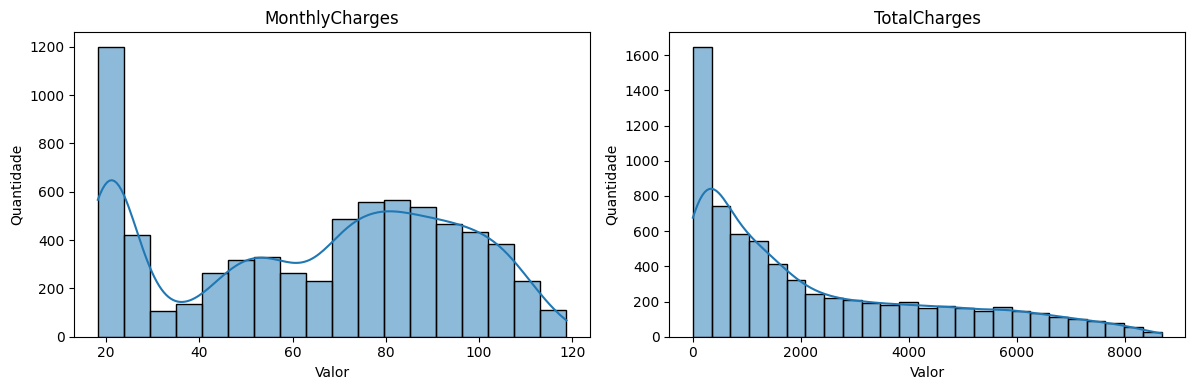

In [22]:
# Plot the distribution of numerical variables
plt.figure(figsize=(18, 4))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(column)
    plt.xlabel("Valor")
    plt.ylabel("Quantidade")
plt.tight_layout()
plt.show()

#### Hipótese 1: Existe relação entre o tempo de permanência do cliente na empresa com o churn

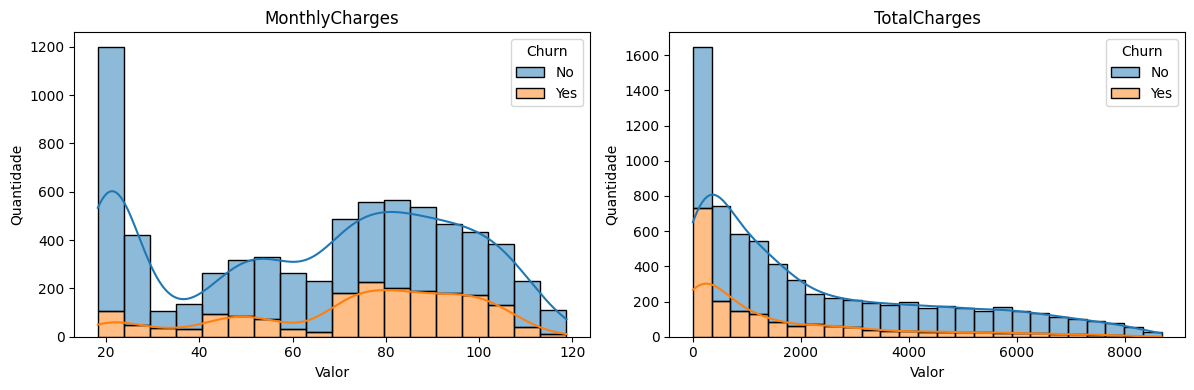

In [23]:
# Plot the distribution of numerical variables
plt.figure(figsize=(18, 4))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=column, kde=True, hue=df["Churn"], multiple="stack")
    plt.title(column)
    plt.xlabel("Valor")
    plt.ylabel("Quantidade")
plt.tight_layout()
plt.show()

Existe um comportamento de churn mais intenso nos primeiros meses de contrato com impresa. Isso pode indicar tanto um problema de qualidade de algum serviço ofertado. Para entendermos melhor tal comportamento, precisamos analisar sepearadamento os churns com tenure entre 0 e 20 meses.

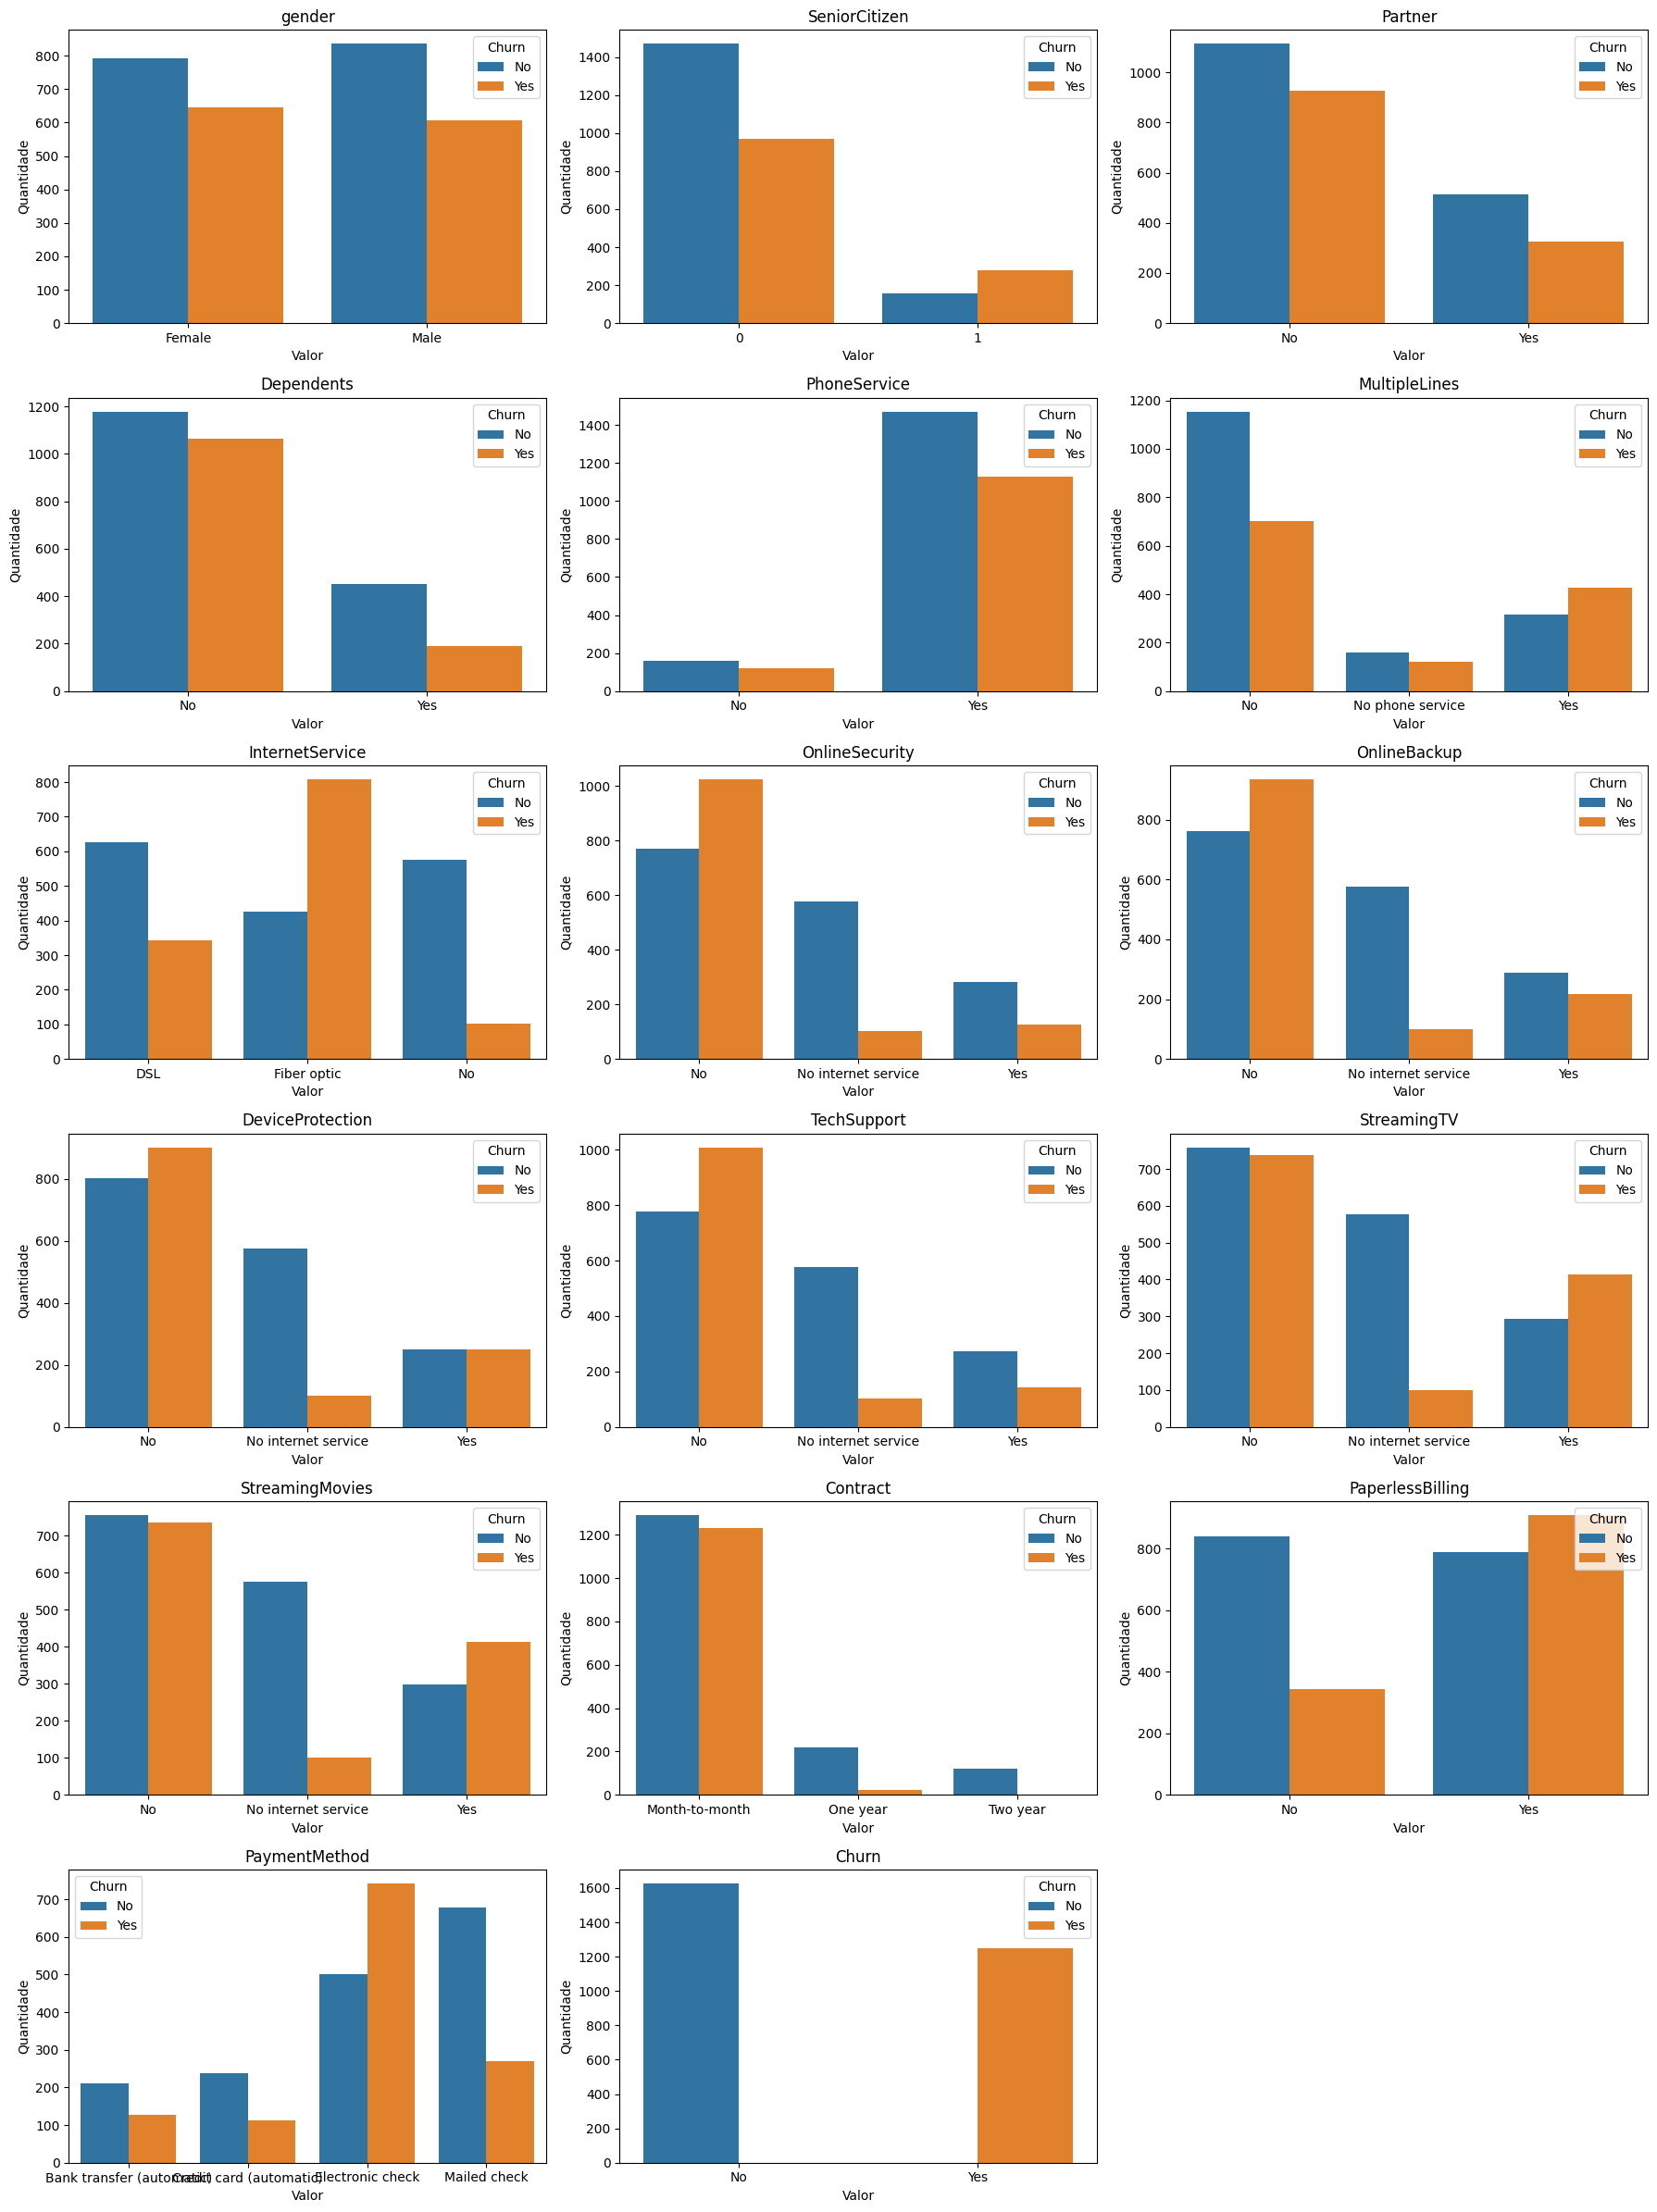

In [24]:
df_tenure_less_than_20 = df[df["tenure"]<=20]
category_columns = df_tenure_less_than_20.select_dtypes(include="category").columns

# Plot the distribution of categorical variables
plt.figure(figsize=(18, 24))
for i, column in enumerate(category_columns, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data=df_tenure_less_than_20, x=column, hue=df_tenure_less_than_20["Churn"])
    plt.title(column)
    plt.xlabel("Valor")
    plt.ylabel("Quantidade")
plt.tight_layout()
plt.show()

In [25]:
df_tenure_less_than_20.shape[0] / df.shape[0]

0.40863268493539684

In [26]:
df_tenure_less_than_20["Churn"].value_counts(normalize=True)


Churn
No     0.565323
Yes    0.434677
Name: proportion, dtype: float64

In [27]:
df_tenure_less_than_20[df_tenure_less_than_20["Churn"]=="Yes"].shape[0] / df[df["Churn"] == "Yes"].shape[0]

0.6693418940609952

Text(0.5, 0, 'time $t$')

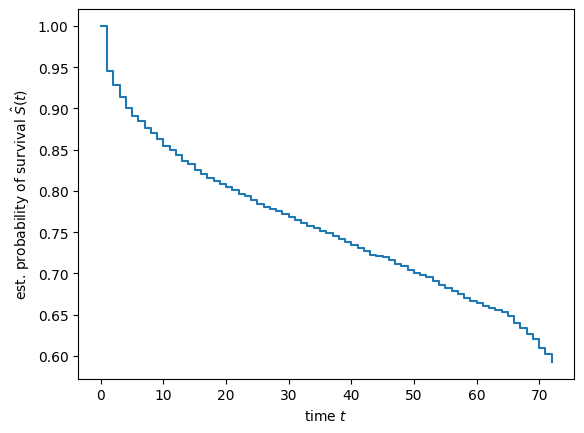

In [32]:
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(
    df["Churn"].map({'Yes':True, 'No': False}), df["tenure"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")


In [56]:
[time,survival_prob]

[array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70., 71., 72.]),
 array([1.        , 0.94596132, 0.92783494, 0.91372452, 0.90104451,
        0.89111052, 0.88482624, 0.87671295, 0.86993299, 0.86239401,
        0.85491516, 0.84969096, 0.84319955, 0.83660256, 0.83237374,
        0.82578174, 0.82072556, 0.8159762 , 0.81153149, 0.80795314,
        0.80451991, 0.80123616, 0.79596229, 0.79338315, 0.7887364 ,
        0.78400357, 0.7808709 , 0.77810863, 0.7755171 , 0.77223657,
        0.76867992, 0.76506473, 0.76070865, 0.7574498 , 0.75461291,
        0.75100693, 0.74854541, 0.74480393, 0.7415061 , 0.7378978 ,
        0.73449734, 0.73076758, 0.7269600